#### Fetching complete Dataset 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import os
import platform
import sys

In [3]:
import nltk
from sklearn.model_selection import train_test_split
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/vchopra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
#  Setting Path to Dataset
def check_if_colab():
    if 'google.colab' in sys.modules:
        return True
    return False

In [5]:
if check_if_colab():
    print("Running on Google Colab")
    # from google.colab import drive
    # drive.mount('/content/drive')
    # BASE_PATH_TO_DATASETS='/content/drive/MyDrive/OMSCS/cs7641/All assignments/Assignments/Assignment-1'
    # BASE_PATH_TO_DATASETS=os.path.join(BASE_PATH_TO_DATASETS,'pubg')
else:
  if platform.system().lower().__contains__('windows'):
      BASE_PATH_TO_PROJECT_REPOSITORY=(os.sep).join(os.getcwd().split(os.sep)[:os.getcwd().split(os.sep).index('Parsec_Assignment')+1])
      BASE_PATH_TO_DATASETS=os.path.join(BASE_PATH_TO_PROJECT_REPOSITORY,'dataset')
      BASE_PATH_TO_CODE_BASE =os.path.join(BASE_PATH_TO_DATASETS, 'code_base')

  elif platform.system().lower().__contains__('linux'):
      BASE_PATH_TO_PROJECT_REPOSITORY=(os.sep).join(os.getcwd().split(os.sep)[:os.getcwd().split(os.sep).index('Parsec_Assignment')+1])
      BASE_PATH_TO_DATASETS=os.path.join(BASE_PATH_TO_PROJECT_REPOSITORY,'dataset')
      BASE_PATH_TO_CODE_BASE=os.path.join(BASE_PATH_TO_PROJECT_REPOSITORY, 'code_base')
  else:
      print('OS Error')
os.listdir(BASE_PATH_TO_DATASETS)

['DataSet.xlsx',
 'modified_dataset.xlsx',
 'modified_dataset_v1.xlsx',
 'modified_dataset_v2.xlsx',
 'modified_dataset_v3.xlsx',
 'modified_testing_df.csv',
 'modified_training_df.csv']

In [6]:
PATH_TO_DATATSET_XLSX=os.path.join(BASE_PATH_TO_DATASETS, 'modified_dataset_v3.xlsx')
PATH_TO_DATATSET_XLSX

'/media/vchopra/DATA/Complete Technical Work/Reference and Tutorial Content/Artificial Intelligence/AI Code Repository/Small_Projects/Natural_Language_Processing_Projects/Parsec_Assignment/dataset/modified_dataset_v3.xlsx'

In [7]:
df=pd.read_csv(PATH_TO_DATATSET_XLSX)
print(df.columns)
df.head()

Index(['datasheet_link', 'target_col', 'fixed_url', 'pdf_text_sample',
       'link_status_code', 'link_time_taken'],
      dtype='object')


,datasheet_link,target_col,fixed_url,pdf_text_sample,link_status_code,link_time_taken
0,https://lfillumination.com/files/specsheets/EF...,lighting,https://lfillumination.com/files/specsheets/EF...,EF400 System # EF408B\nDIE CAST CYLINDRICAL LI...,200,1.022151
1,https://lfillumination.com/files/specsheets/EF...,lighting,https://lfillumination.com/files/specsheets/EF...,EF400 System # EF407B\nDIE CAST CYLINDRICAL LI...,200,0.942223
2,https://www.waclighting.com/storage/waclightin...,lighting,https://www.waclighting.com/storage/waclightin...,ADJUSTABLE BEAM WALL WASH 12V\n5221\nORDERING ...,200,0.800955
3,https://www.acuitybrands.com/api/products/geta...,lighting,https://www.acuitybrands.com/api/products/geta...,Type:\nProject:\nHDMC\nSurface Mount with FAR-...,200,3.050464
4,https://lfillumination.com/files/specsheets/KA...,lighting,https://lfillumination.com/files/specsheets/KA...,Extruded Aluminum\nHousing\nSatin Acrylic\nDif...,200,0.790676


#### Basic Distribution Plot

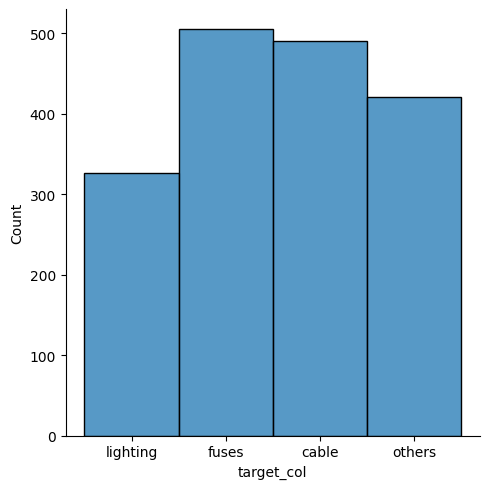

In [8]:
sns.displot(df['target_col'])

In [9]:
df['target_col'].value_counts()

target_col
fuses       505
cable       491
others      421
lighting    327
Name: count, dtype: int64

In [10]:
print(df.info())  # Check for null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datasheet_link    1744 non-null   object 
 1   target_col        1744 non-null   object 
 2   fixed_url         1744 non-null   object 
 3   pdf_text_sample   1744 non-null   object 
 4   link_status_code  1744 non-null   int64  
 5   link_time_taken   1744 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 81.9+ KB
None


In [11]:
print(df['pdf_text_sample'].apply(len).describe())  # Length distribution of text

count      1744.000000
mean       7874.182913
std       11595.564751
min         359.000000
25%        3205.000000
50%        5790.000000
75%        8169.000000
max      259582.000000
Name: pdf_text_sample, dtype: float64


In [12]:
print(df.isna().sum())

datasheet_link      0
target_col          0
fixed_url           0
pdf_text_sample     0
link_status_code    0
link_time_taken     0
dtype: int64


### Basic Data cleaning 

In [13]:
text_column= 'pdf_text_sample'

In [14]:
from nltk.corpus import stopwords, words
import nltk

nltk.download('stopwords')
nltk.download('words')
stop_words = set(stopwords.words('english'))
valid_words = set(words.words())            # Load English dictionary

import spacy
nlp = spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/vchopra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /home/vchopra/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [15]:
import re
# import re

# def clean_text(text):
#     text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only alphabets
#     text = re.sub(r'\s+', ' ', text)  # Remove multiple spaces
#     return text.strip()
# df['pdf_text_sample_cleaned'] = df[text_column].apply(clean_text)

def remove_line_breaks(text):
    # Replace line breaks with space if not at the end of a sentence
    text = re.sub(r'\n+', ' ', text)  # Replace multiple newlines
    text = re.sub(r'(\S)\n(\S)', r'\1 \2', text)  # Handle breaks within sentences
    text = re.sub(r'([a-z])\-\n([a-z])', r'\1\2', text)  # Fix hyphenated words across lines
    return text

def remove_extra_spaces(text):
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text.strip()  # Trim leading/trailing spaces

def remove_special_characters(text):
    # Keep only alphabets and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

def remove_page_headers(text):
    # Example: Remove "Page 1 of 20"
    text = re.sub(r'page \d+\s?(of\s?\d+)?', '', text, flags=re.IGNORECASE)
    return text



def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

def fix_broken_words(text):
    # Fix hyphenated words that break across lines
    text = re.sub(r'(\w+)-\s(\w+)', r'\1\2', text)
    return text

def dictionary_filter(text):
    return ' '.join([word for word in text.split() if word.lower() in valid_words])


def remove_entities(text):
    doc = nlp(text)
    return ' '.join([token.text for token in doc if not token.ent_type_])

def clean_pdf_text(text:str):
    text = text.lower()
    text = remove_line_breaks(text)
    text = remove_extra_spaces(text)
    text = fix_broken_words(text)
    text = remove_special_characters(text)
    text = remove_page_headers(text)
    text = remove_stopwords(text)
    text = dictionary_filter(text)
    text = remove_entities(text)
    return text

df['pdf_text_sample_cleaned'] = df[text_column].apply(clean_pdf_text)

In [16]:
df['pdf_text_sample_cleaned'] = df['pdf_text_sample_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 1]))

In [17]:
### Lemmatization

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

df['pdf_text_sample_cleaned'] = df['pdf_text_sample_cleaned'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /home/vchopra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### EDA

In [18]:
df['word_count'] = df['pdf_text_sample_cleaned'].apply(lambda x: len(x.split()))
df['word_count'].describe()

count    1744.000000
mean      415.204128
std       658.542356
min        24.000000
25%       180.750000
50%       295.000000
75%       385.000000
max      8310.000000
Name: word_count, dtype: float64

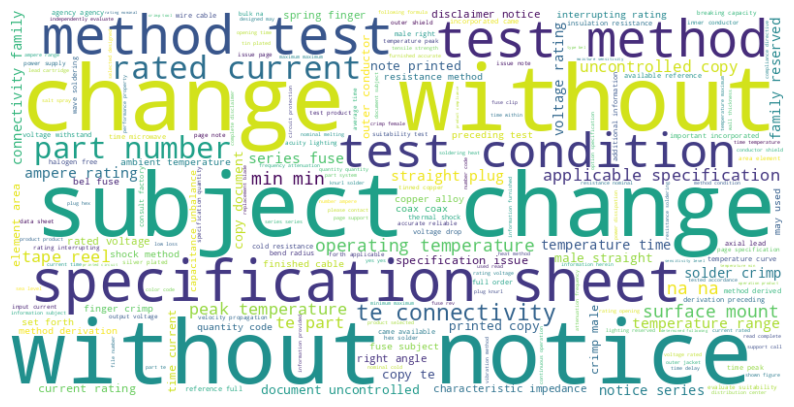

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['pdf_text_sample_cleaned'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


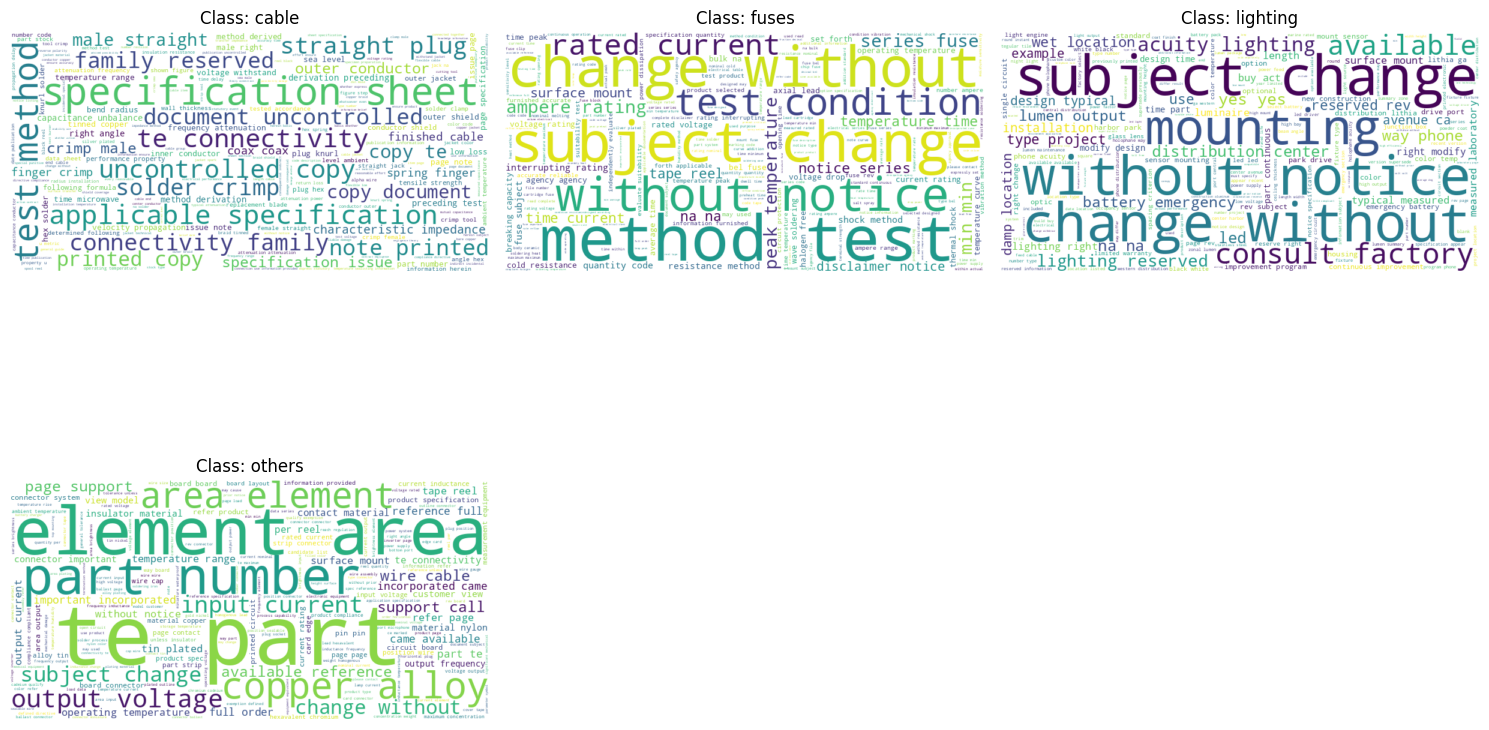

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud_per_class(df, text_column, class_column):
    # Group by class and combine text for each class
    grouped = df.groupby(class_column)[text_column].apply(lambda x: ' '.join(x))

    plt.figure(figsize=(15, 10))

    # Generate a word cloud for each class
    for i, (label, text) in enumerate(grouped.items()):
        plt.subplot(2, 3, i + 1)  # Adjust grid if necessary
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Class: {label}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example Usage
plot_wordcloud_per_class(df, text_column='pdf_text_sample_cleaned', class_column='target_col')

In [21]:
# from sklearn.feature_extraction.text import CountVectorizer

# # Bigram Analysis
# vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=20)
# bigram_matrix = vectorizer.fit_transform(df['pdf_text_sample_cleaned'])
# bigram_counts = dict(zip(vectorizer.get_feature_names_out(), bigram_matrix.sum(axis=0).flat))
# print(bigram_counts)


### Basic Feature Engineering

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['pdf_text_sample_cleaned'], df['target_col'], 
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['target_col']
                                                    )

#### Save training and testing data

In [23]:
training_df = pd.concat([X_train, y_train], axis=1)
training_df.to_csv(os.path.join(BASE_PATH_TO_DATASETS, 'modified_training_df.csv'), index=False)
training_df.head()

,pdf_text_sample_cleaned,target_col
347,type surface mount chip fuse series size compl...,fuses
873,coaxial hardware coaxial hardware flexible coa...,cable
499,fuse subject change without notice series fuse...,fuses
1392,transmission coax braid product description oh...,cable
1511,highway south alpha web customer specification...,cable


In [24]:
testing_df = pd.concat([X_test, y_test], axis=1)
testing_df.to_csv(os.path.join(BASE_PATH_TO_DATASETS, 'modified_testing_df.csv'), index=False)
testing_df.head()

,pdf_text_sample_cleaned,target_col
768,product coax commercial product description co...,cable
138,number type project series trim rectangular du...,lighting
1051,jumper general description prefix plug series ...,others
324,fixture type number project location number co...,lighting
1457,specification sheet cable radio frequency twin...,cable
